# Folium Example
- python3.6.3

In [1]:
import pandas as pd
import pickle

from selenium import webdriver

import folium
from folium.plugins import HeatMap

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

## Load required data

* weather station location

In [2]:
data = pd.read_csv('data/data2.csv')

In [3]:
data.head()

,id,wstnkey,lng,lat
0,7,100,128.7587,37.6869
1,19,116,126.9639,37.4442
2,29,136,128.7073,36.5730
3,33,140,126.7057,35.9930
4,41,155,128.5652,35.1903


* approximate calculation of distance

In [4]:
lng, lat = 126.7057, 35.9930

In [5]:
data['distance'] = data.apply(lambda x: ((x['lat'] - lat)**2 + (x['lng'] - lng)**2)**1/2., axis=1)

# nearest 5 station
nearest_index = data.distance.sort_values().index[:6]

# others
data['radius'] = 3
data['color'] = 'orange'

# target
data.loc[nearest_index[0], 'color'] = 'red'
data.loc[nearest_index[0], 'radius'] = 5

# near 5
data.loc[nearest_index[1:], 'color'] = 'blue'
data.loc[nearest_index[1:], 'radius'] = 4

* load heatmap list
    - elements: (latitude, longitude, value)

In [6]:
with open('heatmap.pkl', 'rb') as f:
    heatmap = pickle.load(f)

## 1. map

In [7]:
Map = folium.Map(location=[36.5102, 127.982], tiles='Stamen Terrain', zoom_start=7)
# iter by weather stations
for tup in data.itertuples():
    folium.RegularPolygonMarker([tup.lat, tup.lng], color=tup.color, fill_color='#769d96',
                                number_of_sides=5, radius=tup.radius).add_to(Map)
Map

# save image
Map.save('figure/map.html')

In [8]:
driver = webdriver.PhantomJS()
driver.set_window_size(1000, 700)  # choose a resolution
driver.get('figure/map.html')
# You may need to add time.sleep(seconds) here
driver.save_screenshot('figure/map.png')

/home/yjlee/venvs/youjin2_py3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


True

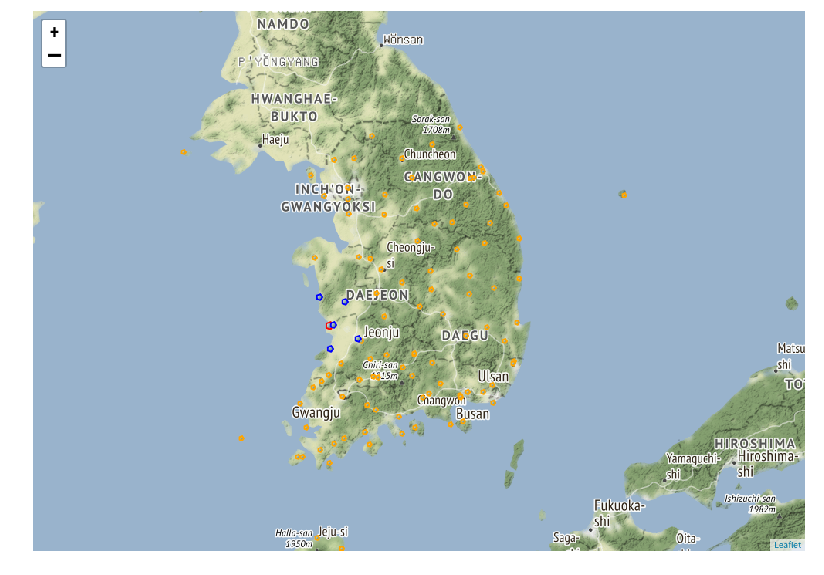

In [9]:
# load image
img = Image.open('figure/map.png')

fig, ax = plt.subplots(1, 1)
ax.imshow(img)
ax.axis('off')
fig.subplots_adjust(right=2, top=2)

## 2. heatmap

In [10]:
Map = folium.Map(location=[33.35, 126.55], zoom_start=11)
HeatMap(heatmap, min_opacity=0, max_val=1100, radius=18, blur=25, max_zoom=5).add_to(Map)

# set bound
Map.min_lat = 32.713376
Map.max_lat = 33.948391
Map.min_lon = 125.771875
Map.max_lon = 127.312148

# show map
Map

# save image
Map.save('figure/heatmap.html')

In [11]:
driver = webdriver.PhantomJS()
driver.set_window_size(4000, 3000)  # choose a resolution
driver.get('figure/heatmap.html')
# You may need to add time.sleep(seconds) here
driver.save_screenshot('figure/heatmap.png')

/home/yjlee/venvs/youjin2_py3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


True

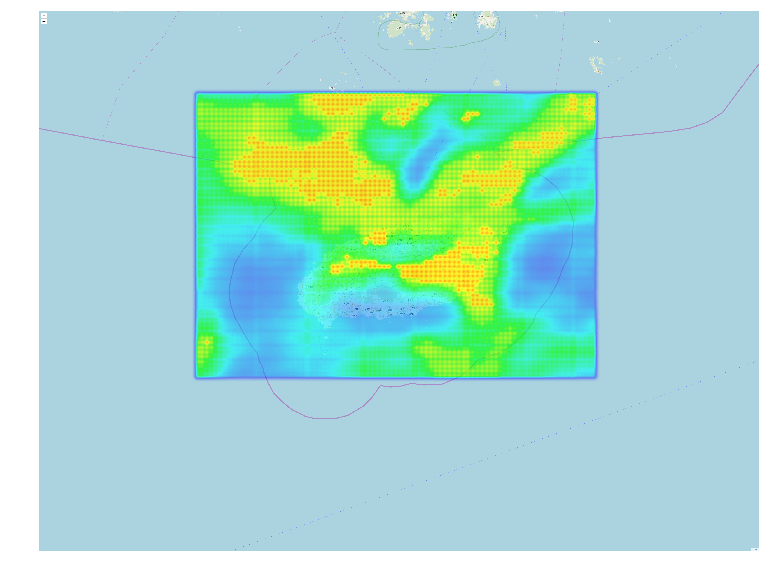

In [12]:
# load image
img = Image.open('figure/heatmap.png')

fig, ax = plt.subplots(1, 1)
ax.imshow(img)
ax.axis('off')
fig.subplots_adjust(right=2, top=2)